In [4]:
import pandas as pd
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

seed = 7

data = pd.read_csv('data/sepsis_final.csv').drop(['Unnamed: 0', 'SUBJECT_ID', 'HADM_ID'], axis=1)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

X = data.drop(['28 Day Death', 'In Hospital Death'], axis=1)
y = data['28 Day Death']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed)

In [6]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X_train)

X_train = pd.DataFrame(imp.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(imp.transform(X_test), columns=X.columns)

In [9]:
import importlib
import medical_explainer_classic
importlib.reload(medical_explainer_classic)

explainer = medical_explainer_classic.explainer(
    X_train, y_train, X_test, y_test
)

| Step 1  ==> Selecting top n features
| Step 2 ==> Transforming features based on quantiles
| Step 3 ==> Fitting logistic regression model on transformed categories
| Step 4 ==> Calibrating logistic regression model


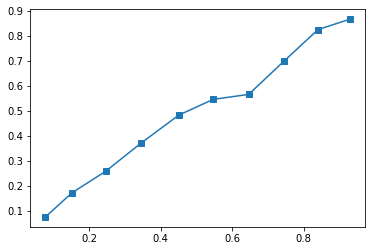

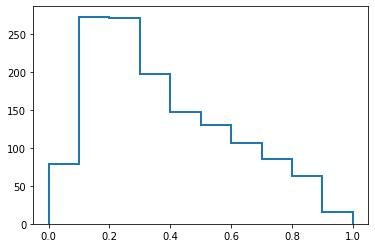

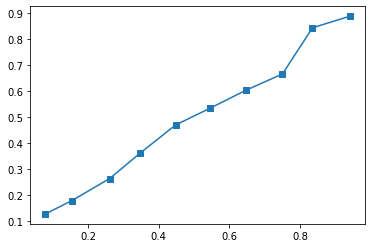

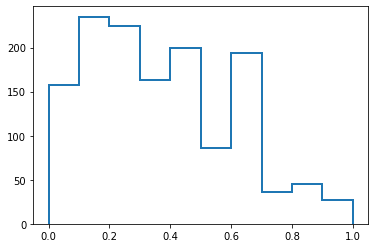

| Step 5 ==> Fit clinical score calculator
Fit clincal score calculator
Threshold:0.1
21

Threshold:0.5
28

Threshold:0.9
36



In [10]:
explainer.fit(10, method='quantile')

In [11]:
explainer.scores

array([1., 1., 3., 5., 6., 2., 2., 3., 4., 6., 2., 2., 3., 4., 5., 2., 2.,
       3., 4., 5., 2., 3., 3., 5., 3., 2., 2., 3., 5., 3., 2., 3., 3., 5.,
       3., 2., 4., 6., 1., 3., 0., 2., 5., 6., 3., 3., 4., 3., 3., 3.])

In [12]:
explainer.selected_features

array(['RDW', 'Lactate Dehydrogenase (LD)', 'Urea Nitrogen', 'Lactate',
       'Phosphate', 'PTT', 'Yeast', 'antifungals', 'inotropes',
       'immunosuppresant'], dtype=object)

In [13]:
explainer.breakpoints_list

[array([11.6, 12.9, 13.9, 17.5, 20.5, 30.5]),
 array([-8.27193799e+00,  1.44000000e+02,  1.99000000e+02,  4.51374108e+02,
         9.52300000e+02,  2.31110000e+04]),
 array([  2.,  10.,  16.,  54.,  93., 272.]),
 array([ 0.3,  0.9,  1.4,  4. ,  7.1, 21.7]),
 array([ 0.2,  1.7,  2.5,  4.7,  6.9, 17.3]),
 array([ 17.7  ,  22.7  ,  26.3  ,  40.2  ,  65.065, 151.   ]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 10. ]),
 array([0., 1., 2., 3., 4., 4.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  , 3.  ]),
 array([0. , 0.5, 1. , 1.5, 2. , 2. ])]

In [14]:
explainer.beta_values

array([-0.67674388, -0.49956116, -0.00634155,  0.59819803,  0.88753929,
       -0.26561762, -0.40739559, -0.13420274,  0.33916965,  0.77113704,
       -0.32275303, -0.26452349, -0.00997413,  0.22990271,  0.67043867,
       -0.30739577, -0.26250468,  0.00899775,  0.24832877,  0.61566467,
       -0.39051196, -0.13249587,  0.11301757,  0.57512645,  0.13795455,
       -0.17975592, -0.15714848,  0.05357466,  0.46101405,  0.12540643,
       -0.35590352,  0.13967752,  0.02431915,  0.49499759,  0.        ,
       -0.28059096,  0.30078366,  0.91104851, -0.62815048,  0.        ,
       -0.95978477, -0.29856275,  0.55034694,  1.01109131,  0.        ,
       -0.0941672 ,  0.29785383,  0.        ,  0.0994041 ,  0.        ])

In [15]:
scores, probs, predictions = explainer.predict_calculator(X_test, threshold_choice=1)

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

roc_auc = roc_auc_score(y_test, probs)
print("ROC AUC: " + str(roc_auc))

average_precision = average_precision_score(y_test, probs)
print("Average Precision: " + str(average_precision))

# accuracy = accuracy_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: " + str(accuracy))

# print(confusion_matrix(y_test, predictions))
print(confusion_matrix(y_test, predictions))


ROC AUC: 0.7395143312823393
Average Precision: 0.6229889358971914
Accuracy: 0.6861741038771031
[[588 256]
 [173 350]]
